In [11]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
from pylab import rcParams 
import matplotlib.pyplot as plt 
import warnings 
from mlxtend.plotting import plot_decision_regions 
from matplotlib.colors import ListedColormap 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_circles 
import seaborn as sns 

In [12]:
X , y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

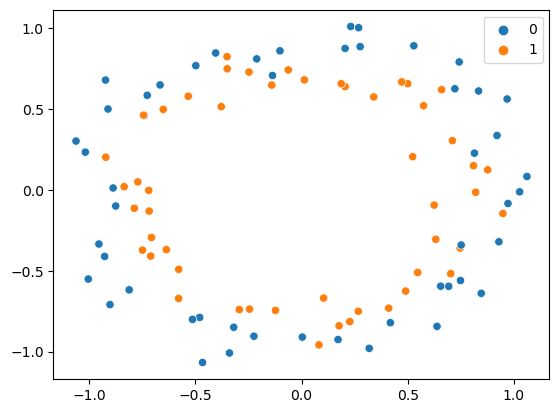

In [13]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [15]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

2024-01-15 18:58:03.305806: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f642c2e54a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-15 18:58:03.305827: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-01-15 18:58:03.313964: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-15 18:58:03.335573: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1705325283.399294   30964 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


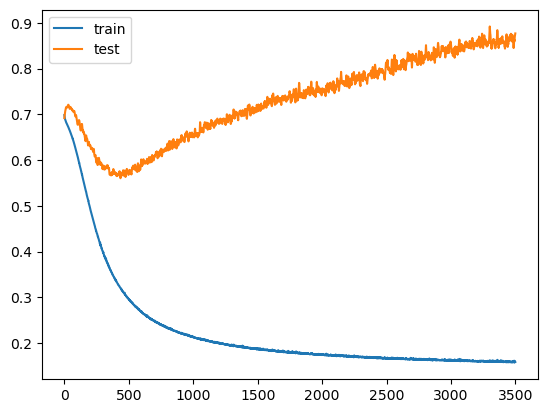

In [18]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 9s 979us/step


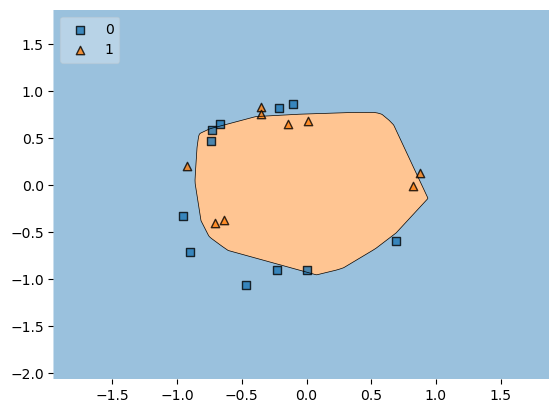

In [19]:
plot_decision_regions(X_test, y_test.ravel(), clf=model, legend=2)
plt.show()

# Early Stopping

In [20]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
callback = EarlyStopping(
            monitor = 'val_loss',
            min_delta=0.00001,
            patience = 20,
            verbose = 1, 
            mode = 'auto',
            baseline=None,
            restore_best_weights=False
)

In [24]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 1s 61ms/step - loss: 0.6985 - accuracy: 0.4750 - val_loss: 0.6955 - val_accuracy: 0.6000
Epoch 2/3500
3/3 [==============================] - 0s 12ms/step - loss: 0.6954 - accuracy: 0.4750 - val_loss: 0.6980 - val_accuracy: 0.5500
Epoch 3/3500
3/3 [==============================] - 0s 13ms/step - loss: 0.6936 - accuracy: 0.5125 - val_loss: 0.6997 - val_accuracy: 0.3500
Epoch 4/3500
3/3 [==============================] - 0s 26ms/step - loss: 0.6921 - accuracy: 0.5500 - val_loss: 0.7006 - val_accuracy: 0.4000
Epoch 5/3500
3/3 [==============================] - 0s 15ms/step - loss: 0.6911 - accuracy: 0.5375 - val_loss: 0.7025 - val_accuracy: 0.4000
Epoch 6/3500
3/3 [==============================] - 0s 13ms/step - loss: 0.6898 - accuracy: 0.5375 - val_loss: 0.7032 - val_accuracy: 0.4000
Epoch 7/3500
3/3 [==============================] - 0s 13ms/step - loss: 0.6895 - accuracy: 0.5500 - val_loss: 0.7037 - val_accuracy: 0.4000
Epoch 8/3500


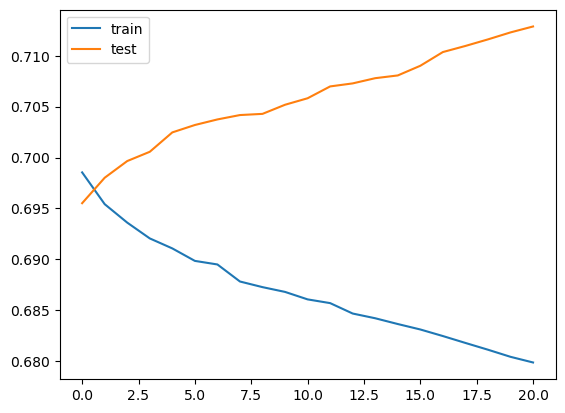

In [25]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 10s 999us/step


<Axes: >

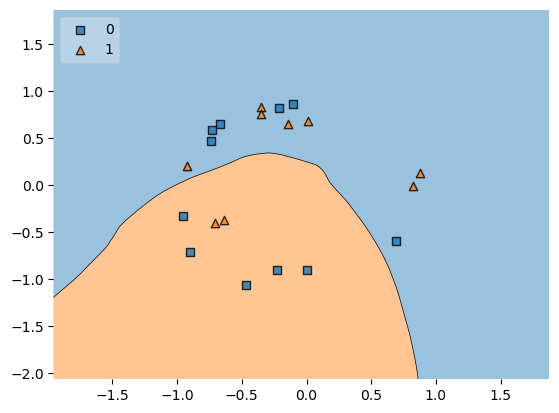

In [26]:
plot_decision_regions(X_test, y_test.ravel(), clf=model, legend=2)
plt.show()